# Intro to COBRA

## References

- Palsson, B. Ø. (2015). Systems Biology: Constraint-based Reconstruction and Analysis. Cambridge: Cambridge University Press. DOI: 10.1017/CBO9781139854610
  - [Video lectures](https://systemsbiology.ucsd.edu/Publications/Books/SB1-2LectureSlides)
- [openCOBRA](https://opencobra.github.io/)
- Another tutorial: https://github.com/migp11/cobrapy-tutorial

## Building a tiny network

In [1]:
import cobra
from cobra.core import Model
from cobra.core import Reaction
from cobra.core import Metabolite

In [2]:
model = Model("tiny")
model.description = "I'm tiny!"

print(f"Hello model '{model.id}'!")

Hello model 'tiny'!


Add internal reactions:

In [3]:
a = Metabolite(id="A")
b = Metabolite(id="B")
c = Metabolite(id="C")

v1 = Reaction(id="v1", lower_bound=0, upper_bound=1000)
v1.add_metabolites({a: -1, b: 1})

v2 = Reaction(id="v2", lower_bound=0, upper_bound=1000)
v2.add_metabolites({a: -1, c: 1})

v3 = Reaction(id="v3", lower_bound=0, upper_bound=1000)
v3.add_metabolites({c: -1, a: 1})

v4 = Reaction(id="v4", lower_bound=0, upper_bound=1000)
v4.add_metabolites({c: -1, b: 1})

model.add_reactions([v1, v2, v3, v4])

Then, add the external bounds:

In [4]:
b1 = Reaction(id="b1", lower_bound=0, upper_bound=1000)
b1.add_metabolites({a: 1})

b2 = Reaction(id="b2", lower_bound=0, upper_bound=1000)
b2.add_metabolites({b: -1})

b3 = Reaction(id="b3", lower_bound=0, upper_bound=1000)
b3.add_metabolites({c: -1})

model.add_reactions([b1, b2, b3])

Then, constrain the network:

In [7]:
model.objective = "b2"
model.reactions.b3.bounds = (10, 1000)

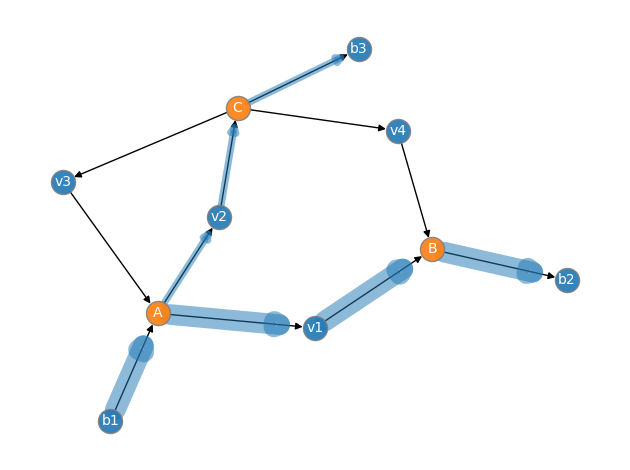

In [8]:
from plotnet import NetPlotter

np = NetPlotter(model)
np.draw()

## Simulating fluxes

## Simulating gene KOs